<a href="https://colab.research.google.com/github/hamza3laa/-Hierarchical-Clustering-/blob/main/Hierarchical_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Hierarchical Clustering?

Here’s a brief overview of how K-means works:

Decide the number of clusters (k)

Select k random points from the data as centroids
Assign all the points to the nearest cluster centroid

Calculate the centroid of newly formed clusters

Repeat steps 3 and 4

But there are certain challenges with K-means.
  - It always tries to make clusters of the same size. 
  - Also, we have to decide the number of clusters at the beginning of the algorithm. 
  
Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

Types of Hierarchical Clustering
There are mainly two types of hierarchical clustering:


 - Agglomerative hierarchical clustering
 - Divisive Hierarchical clustering


##Agglomerative hierarchical clustering

We assign each point to an individual cluster in this technique. Suppose there are 4 data points.

 We will assign each of these points to a cluster and hence will have 4 clusters in the beginning

then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left

We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.






##Divisive Hierarchical Clustering
Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.

So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning:

#**Linkage Methods**

Single Linkage — The distances between the most similar members are calculated for each pair of clusters, and the clusters are then merged based on the shortest distance.

Average Linkage — The distance between all members of one cluster and all members of another cluster is calculated. After that, the average of these distances is used to determine which clusters will merge.

Complete Linkage — For each pair of clusters, the distances between the most dissimilar members are calculated, and the clusters are then merged based on the shortest distance.
Median Linkage — We use the median distance instead of the average distance in a similar way to the average linkage.

Ward Linkage — Determines the distance between clusters using the analysis of variance method.
Centroid Linkage — The centroid of each cluster is calculated by averaging all points assigned to the cluster, and the distance between clusters is then calculated using this centroid.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import scipy.cluster.hierarchy as sch

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
url = '/content/drive/MyDrive/Machine learning/Mostfa othman course/Clustering materials /mall-customers.csv'
df = pd.read_csv(url , sep = ',')

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


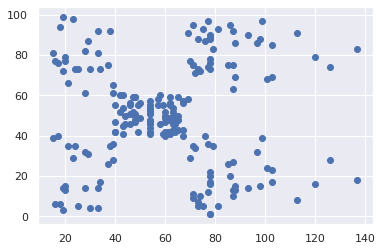

In [9]:
plt.scatter(df['Annual Income (k$)'] , df['Spending Score (1-100)']);

In [11]:
X = df.iloc[:, [3,4]].values


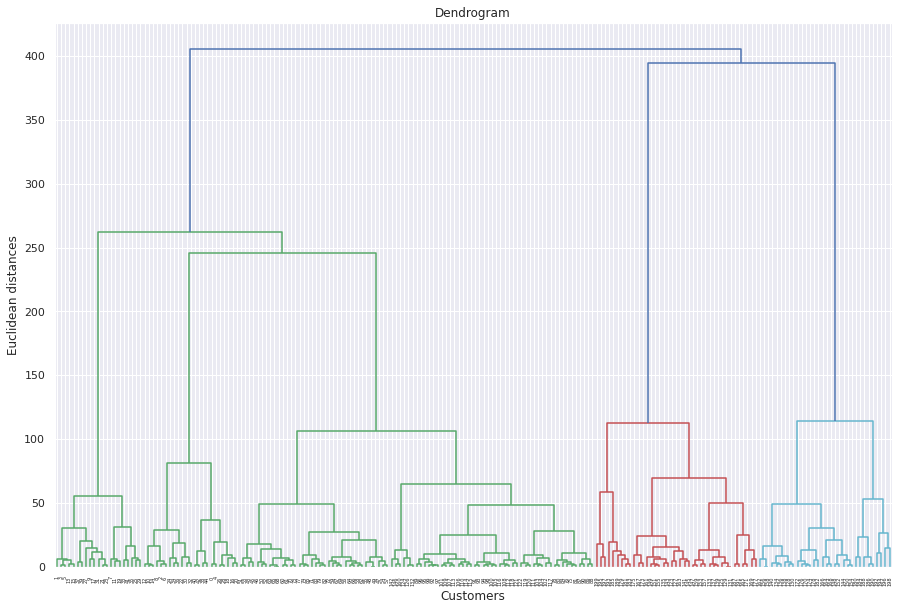

In [12]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Customers are represented on the x-axis, and the Euclidean distance between clusters is represented on the y-axis. How do we figure out the best number of clusters based on this diagram? We want to find the longest vertical distance we can without crossing any horizontal lines, which is the red-framed line in the diagram above. Let’s count the lines on the diagram and figure out how many clusters are best. For this dataset, the cluster number will be 5.

In [ ]:
# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class  
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
# Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the 
# clusters vector that tells for each customer which cluster the customer belongs to.
hc.fit_predict(X)


In [18]:
hc.la

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In any clustering exercise, determining the number of clusters is a time-consuming process. Because the commercial side of the business is more concerned with extracting meaning from these groups, it’s crucial to visualize the clusters in two dimensions and see if they’re distinct. PCA or Factor Analysis can be used to achieve this goal. This is a common method for presenting final results to various stakeholders, making it easier for everyone to consume the output.

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X , method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
#Fitting hierarchical clustering to the Mall_Customes dataset 
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
hc.fit_predict(X)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

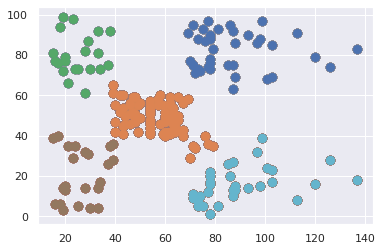

In [ ]:
plt.scatter(X[: , 0] , X[: ,1 ])
for i in hc.labels_:
  plt.scatter(X[hc.labels_ == i , 0],X[hc.labels_==i ,1] ,s=70 ,label=i)



In [ ]:
df['HiercClustrs'] = hc.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMClusters,HiercClustrs
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,4,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,4,3
4,5,Female,31,17,40,1,4


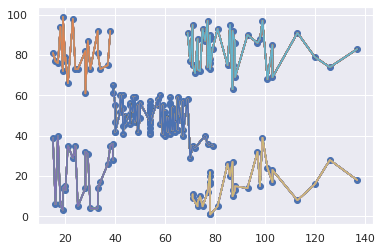

In [ ]:
#Other way to viuslaize
plt.scatter(X[: , 0] , X[: ,1 ])
for i in hc.labels_:
  plt.plot(X[hc.labels_ == i , 0],X[hc.labels_==i ,1] ,label=i)


In [ ]:
df.groupby('KMClusters').mean()[['Spending Score (1-100)' ,'Annual Income (k$)' ]]

,Spending Score (1-100),Annual Income (k$)
KMClusters,,
0,82.128205,86.538462
1,20.913043,26.304348
2,49.518519,55.296296
3,17.114286,88.200000
4,79.363636,25.727273


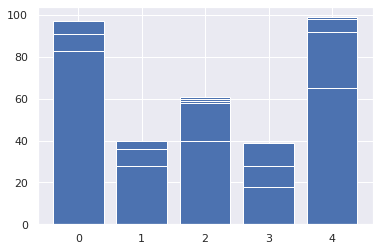

In [ ]:
plt.bar(df['KMClusters'] , df['Spending Score (1-100)']);

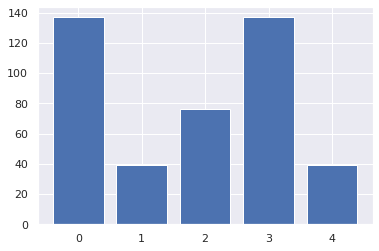

In [ ]:
plt.bar(df['KMClusters'] , df['Annual Income (k$)']);

In [ ]:
annul_income = df.groupby('HiercClustrs').sum()['Annual Income (k$)']
annul_income

HiercClustrs
0    2861
1    4744
2    3375
3     527
4     605
Name: Annual Income (k$), dtype: int64